**Servo Prediction**

**Import library**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Import Data**

In [50]:
data=pd.read_csv("/content/drive/MyDrive/Servo Mechanism.csv")

**Describe Data**

In [4]:
data

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6
...,...,...,...,...,...
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44


In [6]:
data.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [8]:
data.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [9]:
data.isna().sum()

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64

**Data Preprocessing**

In [10]:
data.shape

(167, 5)

In [11]:
data.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [12]:
data[["Motor"]].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [13]:
data[["Screw"]].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

**Encoding the data**

In [14]:
data.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [15]:
data.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

**Define Target Variable (y) and Feature Variables (X)**

In [16]:
y=data['Class']
x=data[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [18]:
y.shape

(167,)

In [20]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [19]:
x.shape

(167, 4)

In [21]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


**Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [27]:
x_train

,Motor,Screw,Pgain,Vgain
76,4,2,4,1
159,0,0,5,4
157,0,1,3,1
120,1,1,4,1
10,1,4,6,5
...,...,...,...,...
72,2,1,5,4
143,0,1,4,2
60,4,1,4,2
50,3,0,6,5


In [28]:
x_test

,Motor,Screw,Pgain,Vgain
35,4,4,3,2
107,3,1,3,1
127,3,0,5,4
115,0,0,4,1
160,3,0,3,2
156,4,1,4,3
53,2,3,5,4
89,2,2,4,2
6,2,0,3,2
165,0,1,3,2


In [29]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((116, 4), (51, 4), (116,), (51,))

**Modeling**

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [32]:
y_pred=lr.predict(x_test)

In [33]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

**Prediction**

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [35]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [36]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [37]:
r2_score(y_test,y_pred)

0.6807245170563927

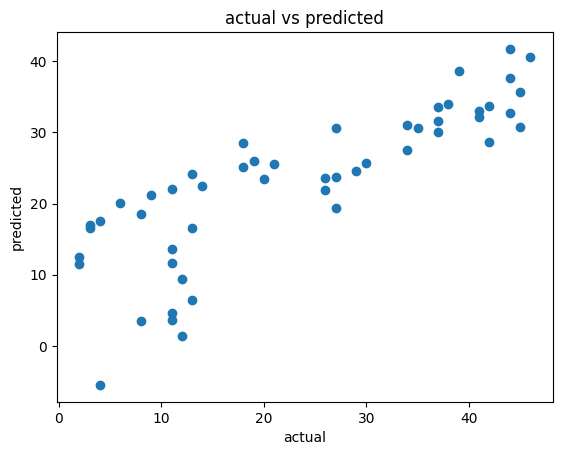

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")
plt.show()

In [43]:
x_new=data.sample(1)

In [44]:
x_new

,Motor,Screw,Pgain,Vgain,Class
123,2,4,3,1,34


In [45]:
x_new=x_new.drop('Class',axis=1)

In [46]:
x_new

,Motor,Screw,Pgain,Vgain
123,2,4,3,1


In [47]:
y_pred=lr.predict(x_new)

In [48]:
y_pred

array([24.06226694])

**Explanation**

Here i have predicted the class of the servomechanism based on specific variables and have used linear regression for prediction and predicted the accuracy of the model
